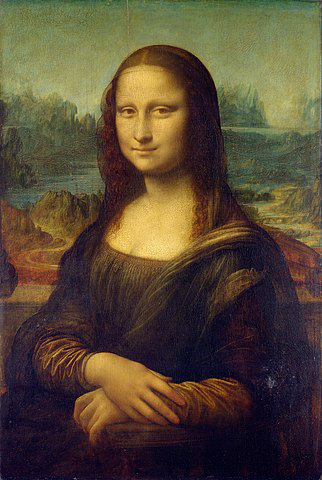

In [ ]:
# pillow numpy matplotlib のインポート
from PIL import Image
import io
import requests
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/322px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg'
img = Image.open(io.BytesIO(requests.get(url).content))
img


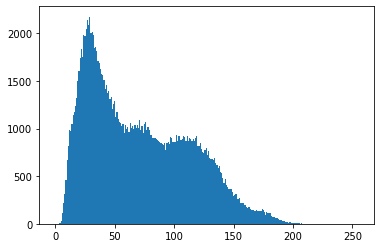

In [ ]:
# 画像サイズを取得
width, height = img.size

# 輝度ごとにピクセル数をカウント
hist = np.zeros(256)
for y in range(height):
  for x in range(width):
    r,g,b = img.getpixel((x,y))
    val = int((r+g+b)/3.0)
    hist[val] += 1

# ヒストグラムの描画
plt.figure()
x = range(0,256)
plt.bar(x, hist, 1.0)
plt.show()

In [ ]:
# しきい値を決定（黒の占める面積を70%と想定）
n = width * height

p = n * 0.70

for i in range(256):
  s = sum(hist[0:i])
  if s >= p:
    threshold = i
    break


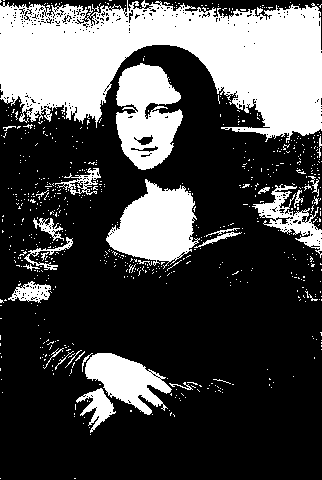

In [ ]:
# 空の画像を生成
new_img = Image.new("RGB",(width,height))

# 輝度を求めて２値化
for y in range(height):
  for x in range(width):
    r,g,b = img.getpixel((x,y))
    val = int((r+g+b)/3.0)
    if val < threshold:
      new_img.putpixel((x,y),(0,0,0))
    else:
      new_img.putpixel((x,y),(255,255,255))

# 画像の表示
new_img
